In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [2]:
# Cargamos los datos.
train_data = pd.read_csv(r'C:\Users\rodri\Desktop\Titanic 2.0\datos\train_data.csv')
test_data = pd.read_csv(r'C:\Users\rodri\Desktop\Titanic 2.0\datos\test_data.csv')

En nuestros análisis, vimos las variables que influyen o podrían influir en si una persona sobrevive o no sobrevive al accidente que tuvo el Titanic. Las variables seleccionadas para entrenar los modelos son las siguientes:

* Survived
* Pclass
* Sex
* Age
* SibSp
* Parch
* Fare_log

In [3]:
# Definimos las columnas predictoras excluyendo las columnas innecesarias y definimos el target.
X = train_data.drop(columns = ['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked', 'TieneCabina'])
y = train_data['Survived']

In [4]:
# Dividimos el dataset de entrenamiento en 80% para entrenar y 20% para validar.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
# Creamos el modelo de regresión logística.
modelo = LogisticRegression(max_iter = 1000)

In [6]:
# Entrenamos el modelo.
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [7]:
# Hacemos predicciones con el conjunto de validación.
y_val_pred = modelo.predict(X_val)

---

#### Evaluaciones del modelo con los datos de validación.

In [8]:
print('Accuracy en validación:', accuracy_score(y_val, y_val_pred))

Accuracy en validación: 0.8156424581005587


In [9]:
print('Informe de clasificación en validación:\n\n',classification_report(y_val, y_val_pred))

Informe de clasificación en validación:

               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



In [10]:
print('AUC-ROC en validación:', roc_auc_score(y_val, y_val_pred))

AUC-ROC en validación: 0.8049549549549551


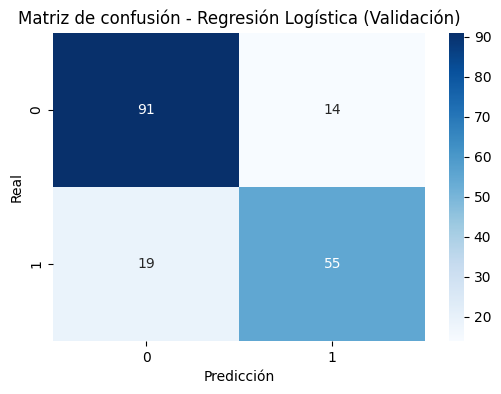

In [12]:
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Matriz de confusión - Regresión Logística (Validación)')
plt.xlabel('Predicción')
plt.ylabel('Real')

plt.show()

El modelo dió un buen rendimiento en términos de **accuracy**, llegando a un valor de 0.82 (82%). La precisión es un poco mayor para la clase 0 (no sobrevivió) con un **f1-score** de 0.85, y la clase 1 (sobrevivió) tiene un **f1-score** de 0.77

* **Precision** para la clase 0 (no sobrevivió): 0.83
* **Recall** para la clase 0: 0.87 -> El modelo detecta correctamente la mayoría de los pasajeros que no sobrevivieron.
* **Precision** para la clase 1 (sobrevivió): 0.80
* **Recall** para la clase 1: 0.74 -> Menor capacidad para identificar correctamente a los sobrevivientes.

El **AUC-ROC** de 0.80 muestra un rendimiento aceptable en la separación de las clases. La **matriz de confusión** muestra:

* El modelo clasificó correctamente a 91 pasajeros que no sobrevivieron y 55 que sobrevivieron.
* Por otra parte, tenemos los 14 pasajeros mal clasificados como sobrevivientes y los 19 sobrevivientes mal clasificados.

Como cierre general, la Regresión Logística nos da un buen balance entre precisión y recall.

---

In [13]:
# Preparamos los datos de prueba.
X_test = test_data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked', 'TieneCabina'])

In [14]:
# Hacemos predicciones con los datos de prueba.
X_test_pred = modelo.predict(X_test)

---